In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.feature_selection import RFE   

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


import math
from sklearn import tree



from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


import math
from sklearn import tree

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving telco_join.csv to telco_join.csv


In [ ]:

df_iris = pd.read_csv('telco_join.csv')

df_iris.head(4)

,State,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Phone,Account Length,Churn,Int'l Plan,VMail Plan
0,KS,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,415,382-4657,128,0,0,1
1,OH,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,415,371-7191,107,0,0,1
2,NJ,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,415,358-1921,137,0,0,0
3,OH,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,408,375-9999,84,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

STATUSs = LabelEncoder()
UNITSs = LabelEncoder()
State = LabelEncoder()
Phone = LabelEncoder()

In [ ]:

df_iris['State'] = STATUSs.fit_transform(df_iris['State'])


df_iris['Phone'] = STATUSs.fit_transform(df_iris['Phone'])

In [ ]:

df_iris.head(10)

,State,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Phone,Account Length,Churn,Int'l Plan,VMail Plan
0,16,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,415,1926,128,0,0,1
1,35,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,415,1575,107,0,0,1
2,31,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,415,1117,137,0,0,0
3,35,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,408,1707,84,0,1,0
4,36,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,415,110,75,0,1,0
5,1,0,223.4,220.6,203.9,6.3,0,98,37.98,101,18.75,118,9.18,6,1.70,510,2253,118,0,1,0
6,19,24,218.2,348.5,212.6,7.5,3,88,37.09,108,29.62,118,9.57,7,2.03,510,1047,121,0,0,1
7,24,0,157.0,103.1,211.8,7.1,0,79,26.69,94,8.76,96,9.53,6,1.92,415,80,147,0,1,0
8,18,0,184.5,351.6,215.8,8.7,1,97,31.37,80,29.89,90,9.71,4,2.35,408,291,117,0,0,0
9,49,37,258.6,222.0,326.4,11.2,0,84,43.96,111,18.87,97,14.69,5,3.02,415,117,141,0,1,1


In [ ]:
feature_cols= ['VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Area Code', 'Account Length','Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'VMail Plan' ]


In [ ]:

telco_X=df_iris[['VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Area Code', 'Account Length','Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'VMail Plan' ]]
telco_y=df_iris.Churn

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(telco_X, telco_y,test_size=0.2, random_state=41)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
tree_clf.fit(telco_X, telco_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=36, splitter='best')

In [ ]:

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
Y_pred = tree_clf.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [ ]:
predictions = tree_clf.predict(telco_X)


In [ ]:
print("Testing Accuracy :", tree_clf.score(telco_X, telco_y,))
print("Training Accuracy :", tree_clf.score(xtrain,ytrain))

Testing Accuracy : 0.8811881188118812
Training Accuracy : 0.8589647411852963


In [ ]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=6, min_samples_leaf= 7)
tree_clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

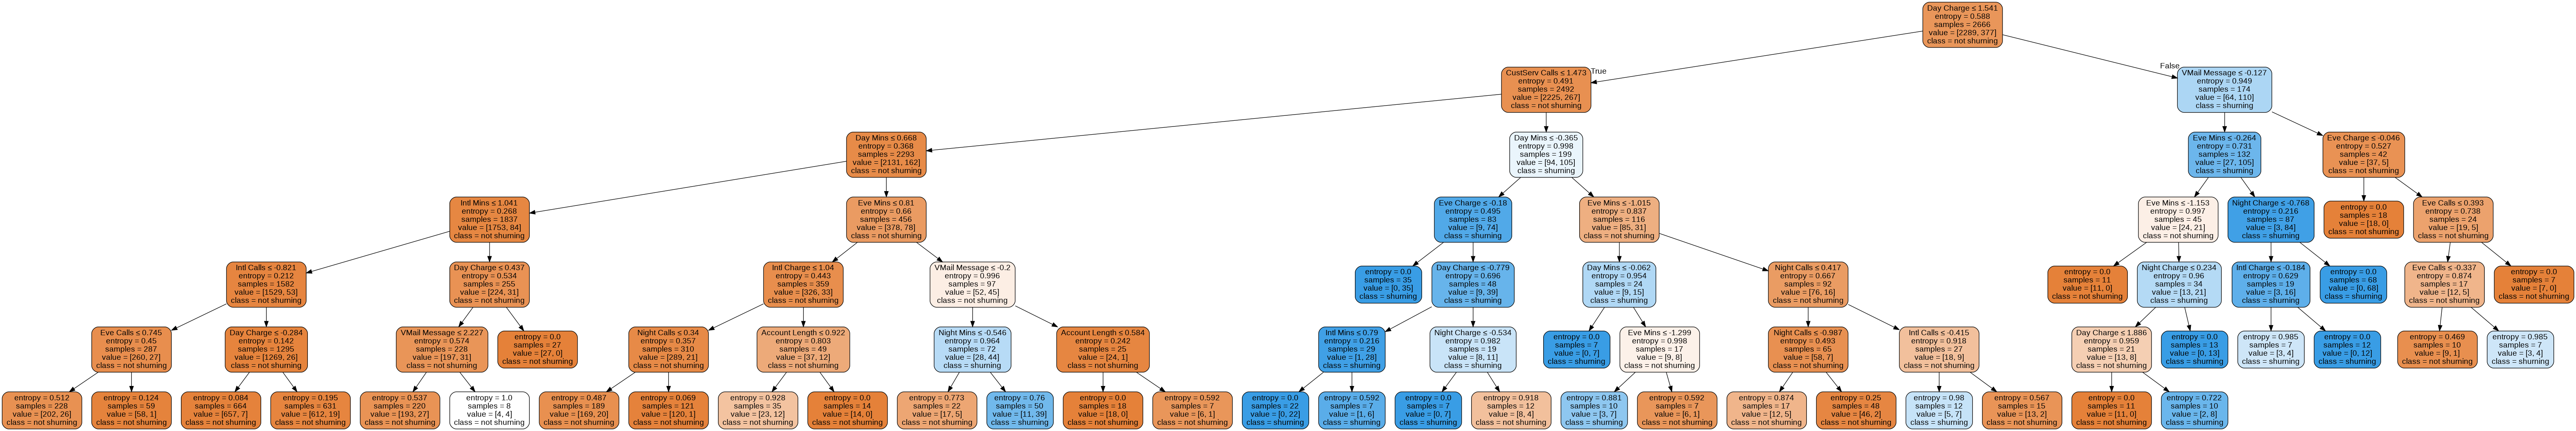

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['not shurning','shurning',])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('betes.png')
Image(graph.create_png())